In [113]:
# Data Structures
import numpy  as np
import pandas as pd
#import geopandas as gpd
import json

# Corpus Processing
import re
# import nltk.corpus
from unidecode                        import unidecode
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize                    import word_tokenize
from nltk import pos_tag
from nltk                             import SnowballStemmer

from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing            import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

# Map Viz
#import folium
#import branca.colormap as cm
#from branca.element import Figure

In [94]:
#import matplotlib
#matplotlib.use("QtAgg")

In [57]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\britt\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [2]:
import os
os.chdir(r"c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination")

In [3]:
def read_file(file_name):
    """
    This function will read the text files passed & return the list
    """
    with open(file_name, "r", encoding="utf-8") as f:
        words = f.read()
    return words

In [4]:
corpus = []
for bulletin in os.listdir("data/cleaned_data/job_bulletins/unlabeled"):
    document = read_file(f"data/cleaned_data/job_bulletins/unlabeled/{bulletin}").replace("\n", " ")
    corpus.append(document)

In [5]:
corpus[18][0:447]

'AIRPORTS MAINTENANCE SUPERVISOR  Class Code:       3336 Open Date:  11-16-18 (Exam Open to Current City Employees)  ANNUAL SALARY   $66,523 to $97,321; $70,177 to $102,625; and $72,307 to $105,652  NOTES:  1. Annual salary is at the start of the pay range. The current salary range is subject to change. Please confirm the starting salary with the hiring department before accepting a job offer. 2. Candidates from the eligible list are normally a'

In [6]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

def penn_to_wn(tag):
    return get_wordnet_pos(tag)

In [39]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [92]:
stemmer = WordNetLemmatizer()
preprocessed_corpus = []
more_stopwords = ["los", "angeles", "city", "class", "code", "may", "candidate", "examination", "application", "time"]

for i, document in enumerate(corpus):
    remove_https = re.sub(r"http\S+", "", document)
    remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    remove_numbers_punctuations = re.sub(r"[^a-zA-Z]+", " ", remove_com) 
    pattern = re.compile(r'\s+') 
    remove_extra_whitespaces = re.sub(pattern, ' ', remove_numbers_punctuations)
    only_ascii = unidecode(remove_extra_whitespaces)
    doc = only_ascii.lower()

    list_of_tokens = word_tokenize(doc)
    list_of_tokens_pos = pos_tag(list_of_tokens)
    list_of_tokens_wn_pos = [(token[0], penn_to_wn(token[1])) for token in list_of_tokens_pos if token[0] not in stopwords.words("english")]
    list_of_lemmas = [stemmer.lemmatize(token[0], token[1]) if token[1] != "" else stemmer.lemmatize(token[0]) for token in list_of_tokens_wn_pos]
    list_of_lemmas = [lemma for lemma in list_of_lemmas if lemma not in more_stopwords]
    
    preprocessed_corpus.append(" ".join(list_of_lemmas))

In [93]:
preprocessed_corpus[18][0:447]

'airport maintenance supervisor open date exam open current employee annual salary note annual salary start pay range current salary range subject change please confirm start salary hiring department accept job offer eligible list normally appoint vacancy low pay grade position duties airports maintenance supervisor plan organize direct work labor maintenance crew perform variety maintenance activity airport property include operation custodial'

In [122]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(preprocessed_corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

final_df = tf_idf

print(f"{final_df.shape[0]} rows")
final_df.T.nlargest(5, 0)

506 rows


,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
accounting,0.556773,0.495554,0.075728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
financial,0.291644,0.120349,0.033717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
generally,0.251788,0.000000,0.048516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
test,0.145897,0.227443,0.157428,0.257727,0.025425,0.023612,0.018332,0.019396,0.023781,0.027037,...,0.074245,0.014309,0.160212,0.091004,0.012587,0.194795,0.071794,0.0,0.019743,0.014377
audit,0.140498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [115]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(preprocessed_corpus)
counts = pd.DataFrame(data = X.toarray(), columns=count_vectorizer.get_feature_names_out())

final_counts_df = counts

print(f"{final_counts_df.shape[0]} rows")
final_counts_df.T.nlargest(5, 1)

506 rows


,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
test,15,17,14,12,2,2,2,1,2,2,...,7,1,13,17,1,12,6,0,2,2
choice,4,15,4,3,1,1,1,1,1,1,...,2,1,3,4,1,1,1,1,1,1
multiple,3,14,3,2,0,0,0,0,0,0,...,1,0,2,3,0,0,0,0,0,0
qualify,7,12,9,0,3,0,0,0,3,3,...,1,1,7,7,1,9,0,4,3,3
accounting,17,11,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
list(final_df.columns)

['aam',
 'aanp',
 'aashto',
 'ab',
 'abandon',
 'abandoned',
 'abate',
 'abatement',
 'abbreviated',
 'abbreviation',
 'abide',
 'abilities',
 'ability',
 'able',
 'abnormal',
 'aboard',
 'aboveground',
 'abovehead',
 'abrasion',
 'abrasive',
 'abreast',
 'absence',
 'abstract',
 'abstracting',
 'abstraction',
 'abuse',
 'abyc',
 'ac',
 'academia',
 'academic',
 'academy',
 'accelerants',
 'accelerator',
 'accept',
 'acceptability',
 'acceptable',
 'acceptance',
 'accepted',
 'access',
 'accessibility',
 'accessible',
 'accessories',
 'accessory',
 'accident',
 'accidental',
 'accommodate',
 'accommodation',
 'accomplish',
 'accomplishment',
 'accord',
 'accordance',
 'accordingly',
 'account',
 'accountability',
 'accountancy',
 'accountant',
 'accountants',
 'accounting',
 'accredit',
 'accreditation',
 'accredited',
 'accrual',
 'accrue',
 'accuracy',
 'accurate',
 'accurately',
 'ace',
 'acetylene',
 'achieve',
 'achievement',
 'acid',
 'acknowledgment',
 'acls',
 'acquaint',
 'acq

In [96]:
def run_k_means(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2, max_k):
        kmeans = cluster.KMeans(n_clusters = k,
                                init = 'k-means++',
                                n_init = 10,
                                
                                tol = 0.0001,
                                random_state = 1)

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [97]:
def print_avg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print(f"Average: {avg.round(4)}\tK:{avg_dict[avg]}")

In [98]:
def plot_silhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()

In [99]:
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if plot: 
            plot_silhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [100]:
k = 8
kmeans_results = run_k_means(k, final_df)

In [117]:
kmeans_results_counts = run_k_means(k, final_counts_df)

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


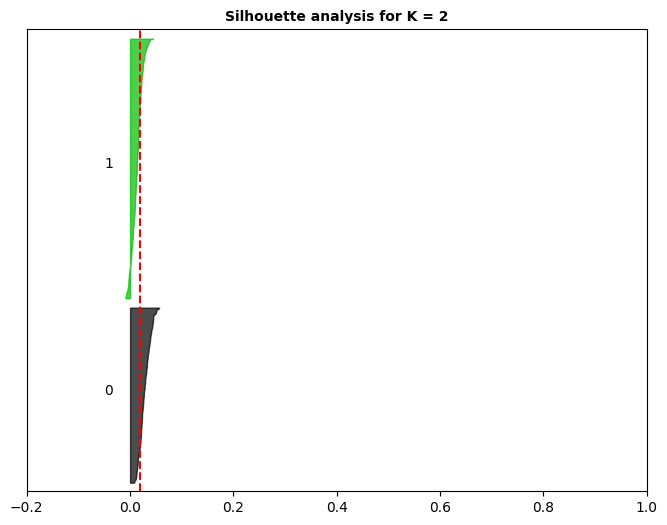

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


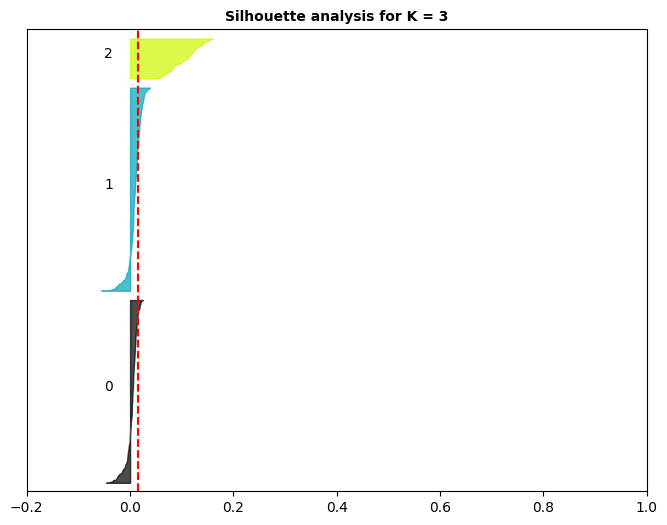

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


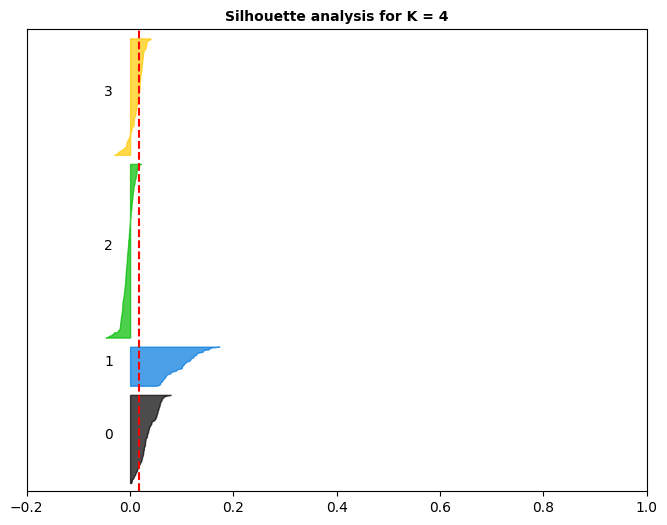

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


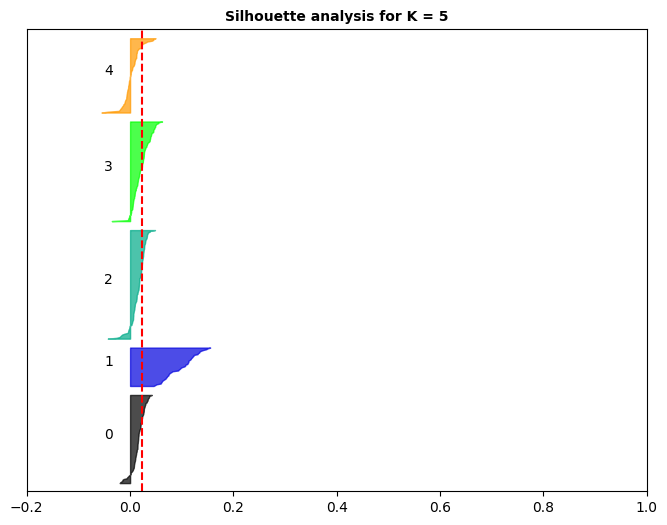

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


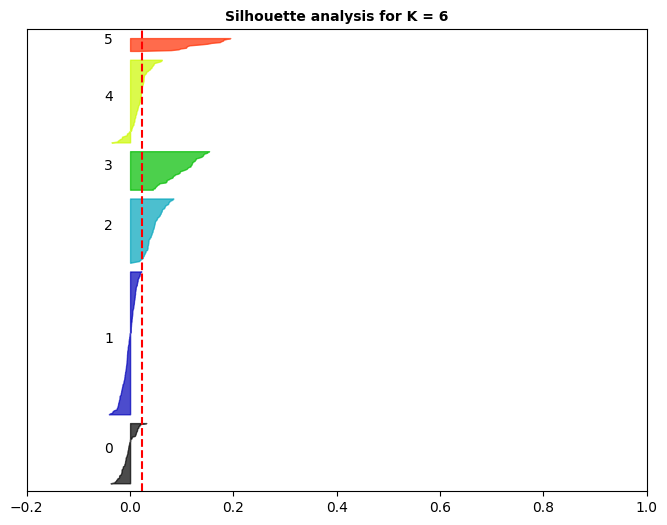

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


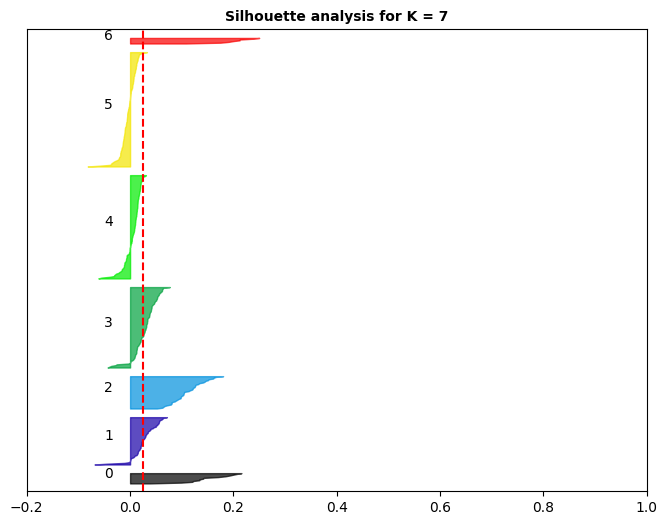

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


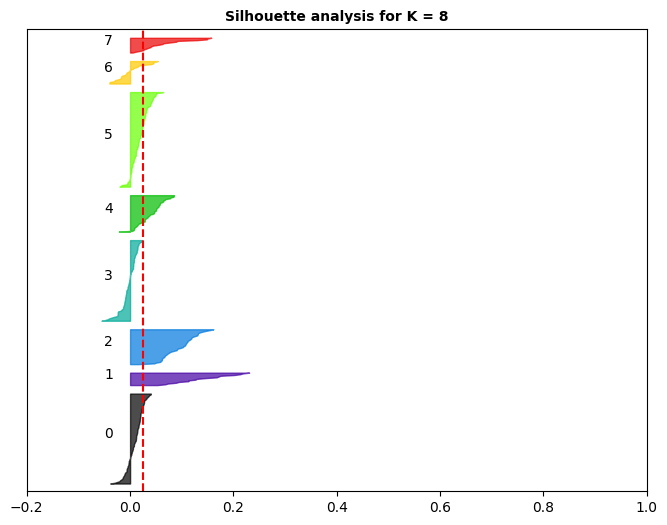

In [101]:
silhouette(kmeans_results, final_df, plot=True)

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


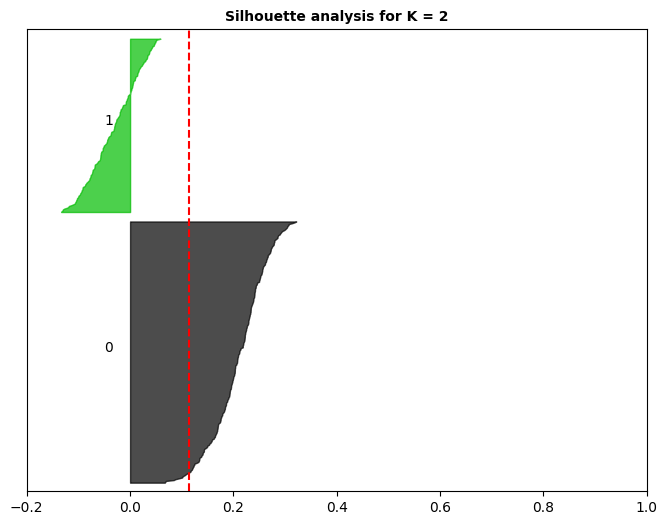

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


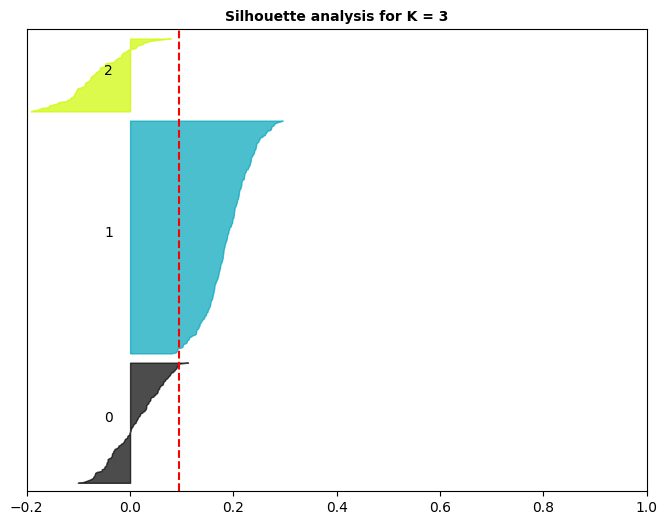

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


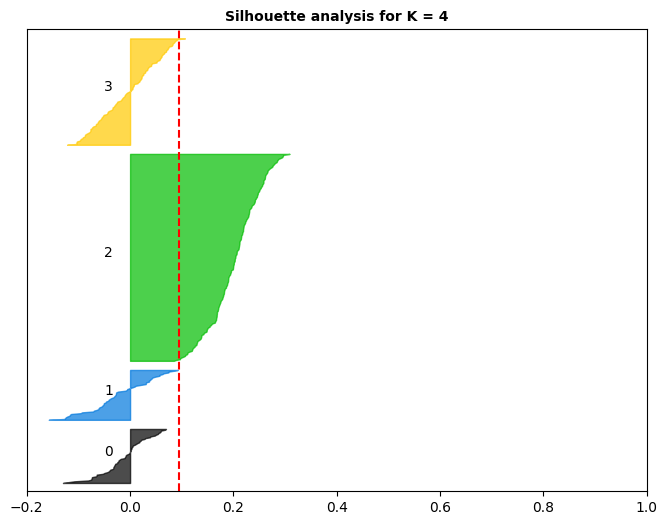

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


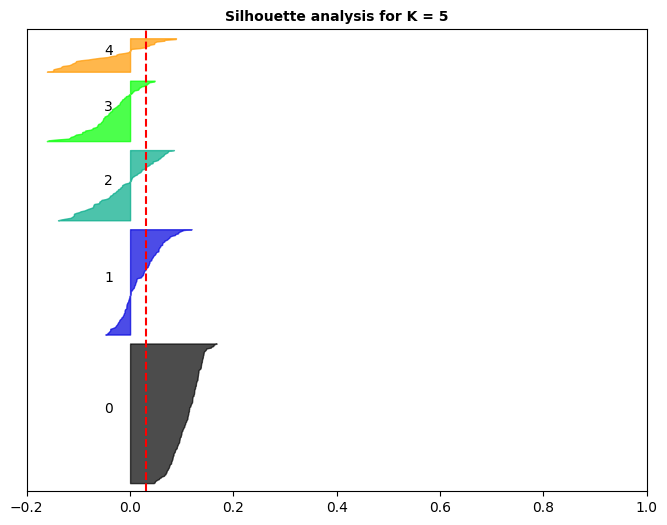

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


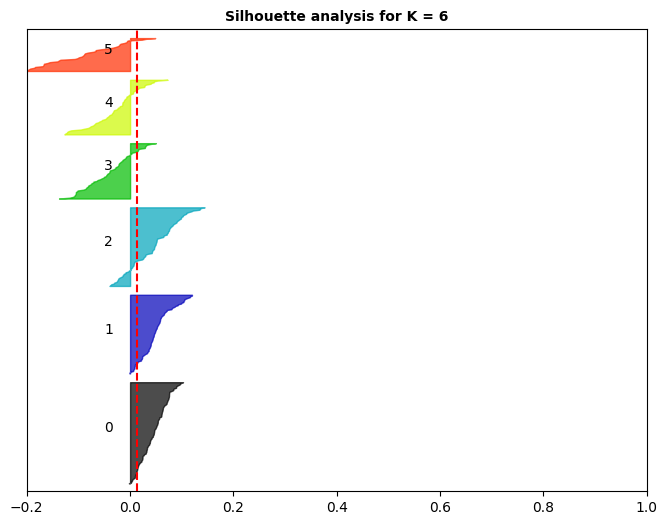

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


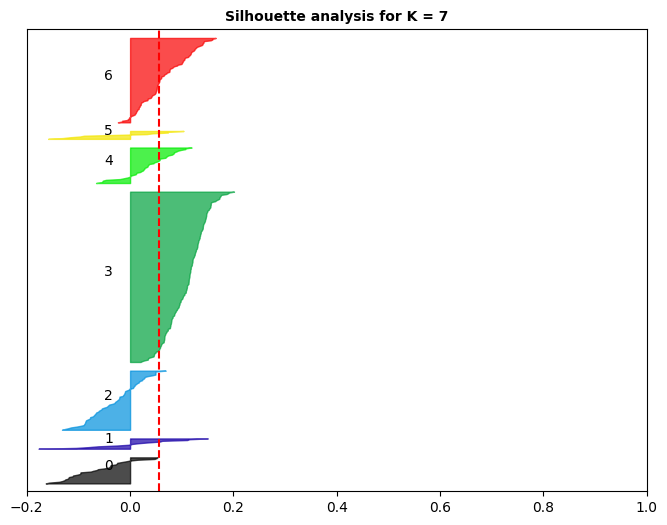

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination\venv_job_discrimination\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


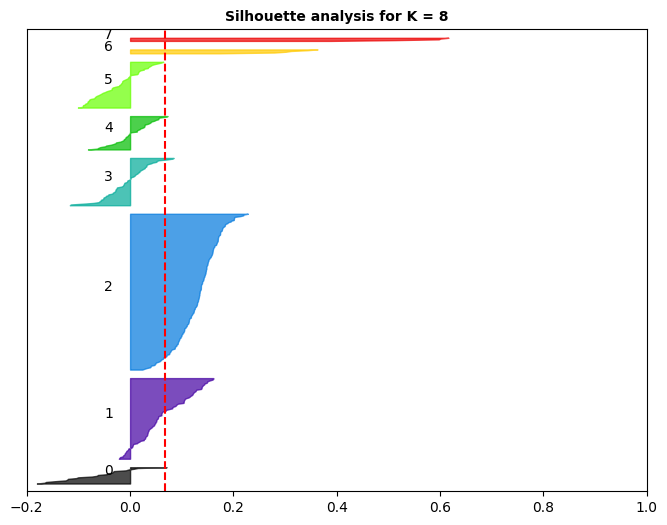

In [118]:
silhouette(kmeans_results_counts, final_counts_df, plot=True)

In [119]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats, features):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

In [120]:
def plot_words(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

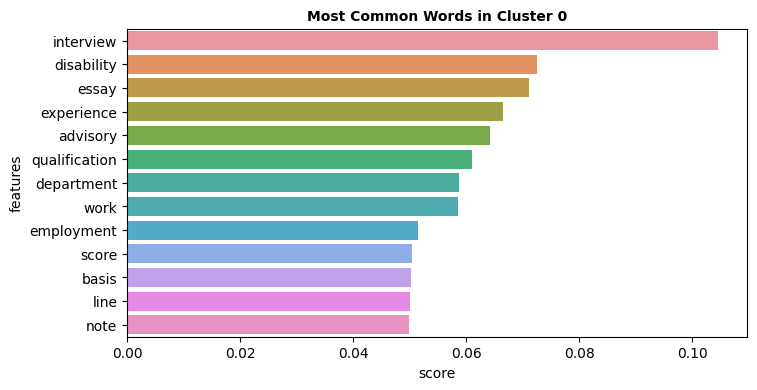

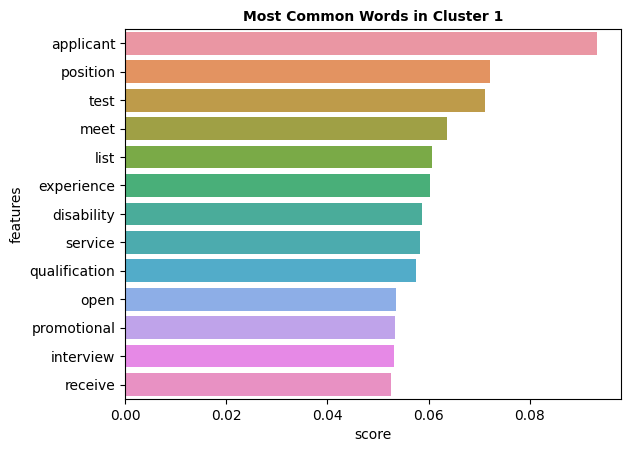

In [123]:
best_result = 2
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats, tfidf_vectorizer.get_feature_names_out())
plot_words(dfs, 13)

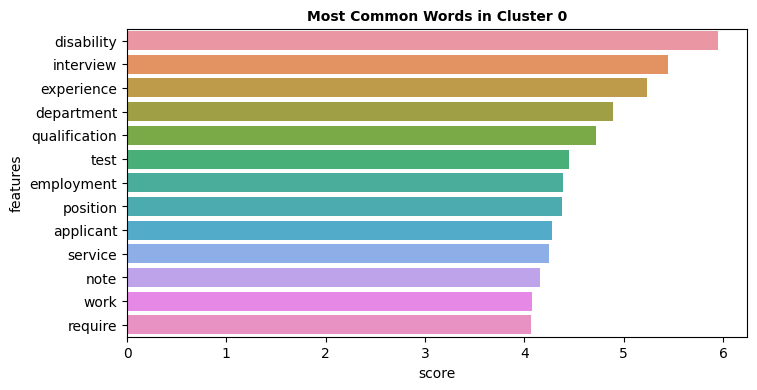

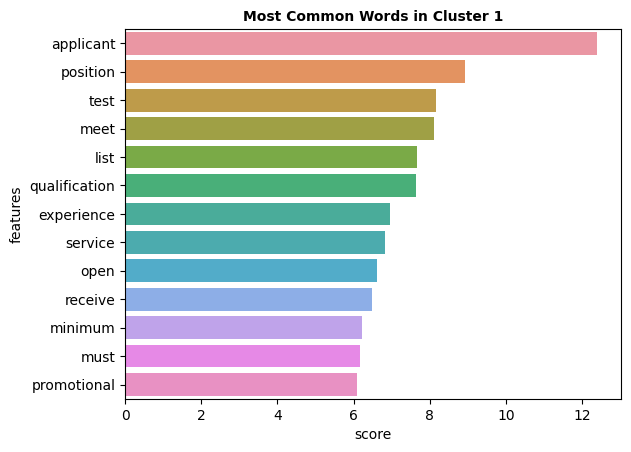

In [127]:
best_result = 2
kmeans_counts = kmeans_results_counts.get(best_result)

final_df_array = final_counts_df.to_numpy()
prediction = kmeans_counts.predict(final_counts_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats, count_vectorizer.get_feature_names_out())
plot_words(dfs, 13)

In [128]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroids_dict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

In [129]:
def generate_wordclouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroids_dict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

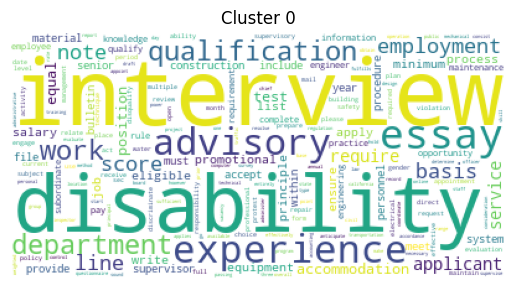

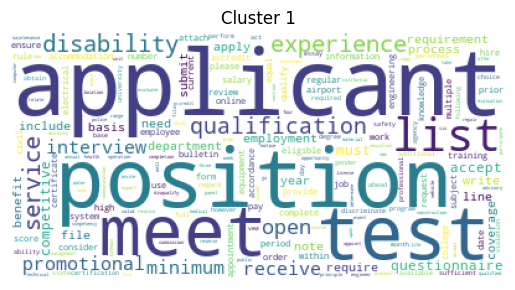

In [107]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generate_wordclouds(centroids)

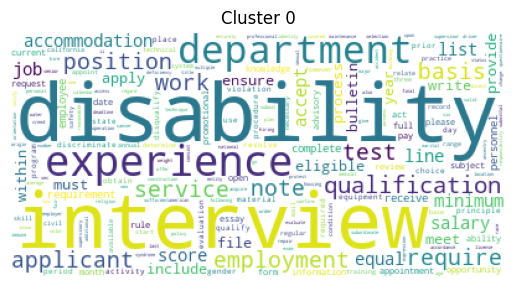

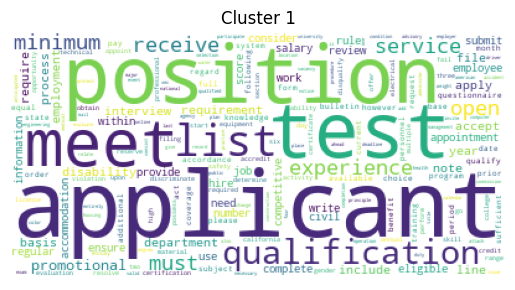

In [130]:
centroids_counts = pd.DataFrame(kmeans_counts.cluster_centers_)
centroids_counts.columns = final_counts_df.columns
generate_wordclouds(centroids_counts)

In [108]:
bulletins_df = pd.DataFrame(corpus)

In [109]:
bulletins_df["Preprocessed corpus"] = preprocessed_corpus

In [110]:
bulletins_df["Label"] = kmeans.labels_

In [111]:
bulletins_df

,0,Preprocessed corpus,Label
0,ACCOUNTANT Class Code: 1513 Open Date: ...,accountant open date exam open include current...,1
1,ACCOUNTING RECORDS SUPERVISOR Class Code: ...,accounting record supervisor open date exam op...,0
2,ADMINISTRATIVE ANALYST Class Code: 1590...,administrative analyst open date exam open cur...,0
3,ADMINISTRATIVE CLERK Class Code: 1358 ...,administrative clerk open date exam open inclu...,1
4,ADMINISTRATIVE HEARING EXAMINER Class Code: ...,administrative hearing examiner open date exam...,1
...,...,...,...
501,WINDOW CLEANER Class Code: 3173 Open Da...,window clean open date exam open current emplo...,1
502,X-Ray and Laboratory Technician Class Code: ...,x ray laboratory technician open date exam ope...,1
503,ZOO CURATOR Class Code: 4297 Open Date...,zoo curator open date exam open include curren...,1
504,ZOO CURATOR OF EDUCATION Class Code: 43...,zoo curator education open date exam open incl...,1


In [112]:
centroids

,aam,aanp,aashto,ab,abandon,abandoned,abate,abatement,abbreviated,abbreviation,...,yielding,young,youth,youtube,zone,zoning,zoo,zoological,zoology,zoom
0,1.626303e-19,-1.355253e-19,3.252607e-19,-2.168404e-19,-4.065758e-20,1.911685e-04,2.303930e-19,0.001538,1.355253e-19,0.000256,...,-1.897354e-19,0.000000,9.757820e-19,-2.032879e-19,0.004720,0.001184,2.602085e-18,2.439455e-19,0.000183,-1.084202e-19
1,2.309250e-04,3.073549e-04,2.813523e-04,2.268871e-04,1.281691e-04,2.303930e-19,1.955996e-04,0.000884,2.352243e-04,0.000598,...,2.453822e-04,0.000127,1.353324e-03,1.369784e-04,0.002304,0.001192,7.199912e-03,2.829680e-04,0.001491,1.820739e-04
